In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

# Load the Data

In [2]:
df = pd.read_csv('/Users/braulio/Documents/data/ECA_blended_custom/temp_data.txt')
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


## Temperature Forecast I
Discuss the following questions:

1. What does the temperature forecast for Berlin for any given day depend on? The year? Is there an underlying trend the temperature follows? The day of the year? Does the temperature depend on the season of the year? The temperature of the previous day? Is the present able to explain part of the (near) future?
2. If we know the day of the year, the year and the temperature of the previous day, are we able to perfectly predict the temperature of any given day in Berlin?

## Plot the time series

In [3]:
# pd.to_datetime(df['DATE'])
df.columns = ['Source_ID', 'DATE', 'Mean_temp', 'q_tg']

In [4]:
df.columns

Index(['Source_ID', 'DATE', 'Mean_temp', 'q_tg'], dtype='object')

In [5]:
df["Date"] = pd.to_datetime(df["DATE"], format='%Y%m%d')

In [6]:
del df['DATE']

In [7]:
df.head()

,Source_ID,Mean_temp,q_tg,Date
0,127488,22,0,1876-01-01
1,127488,25,0,1876-01-02
2,127488,3,0,1876-01-03
3,127488,-58,0,1876-01-04
4,127488,-98,0,1876-01-05


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52777 entries, 1876-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Source_ID  52777 non-null  int64  
 1   Mean_temp  52777 non-null  float64
 2   q_tg       52777 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


In [8]:
# Set the new columns as the index
df.set_index('Date', inplace=True)

df.head()

,Source_ID,Mean_temp,q_tg
Date,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0


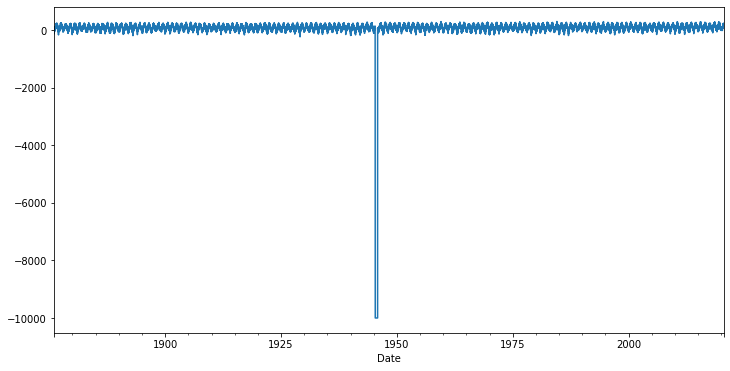

In [9]:
# Plot the series
df['Mean_temp'].plot()

In [11]:
df.loc[:,'Mean_temp'] *= 0.1
df.describe()

,Source_ID,Mean_temp,q_tg
count,52777.000000,52777.000000,52777.000000
mean,124188.602156,5.657978,0.033253
std,4334.752786,61.737913,0.546057
min,111448.000000,-999.900000,0.000000
25%,121152.000000,3.300000,0.000000
50%,127488.000000,9.300000,0.000000
75%,127488.000000,15.700000,0.000000
max,127848.000000,30.800000,9.000000


In [13]:
df2 = df.loc[df['Mean_temp'] > -100]

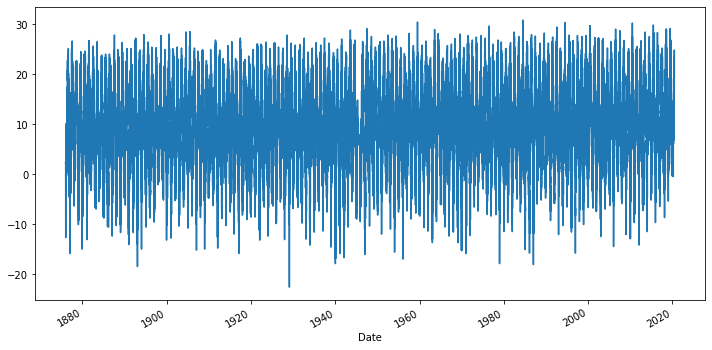

In [14]:
df2['Mean_temp'].plot()